In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel('ecommerce_data.xlsx')

# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Explore the dataset
print(data.head())


C:\Users\FFATHIMA\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
# Extract year, month, day, and hour from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

# Calculate TotalPrice (Quantity * UnitPrice)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [3]:
# Calculate RFM metrics
rfm_df = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (data['InvoiceDate'].max() - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Normalize the RFM metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)


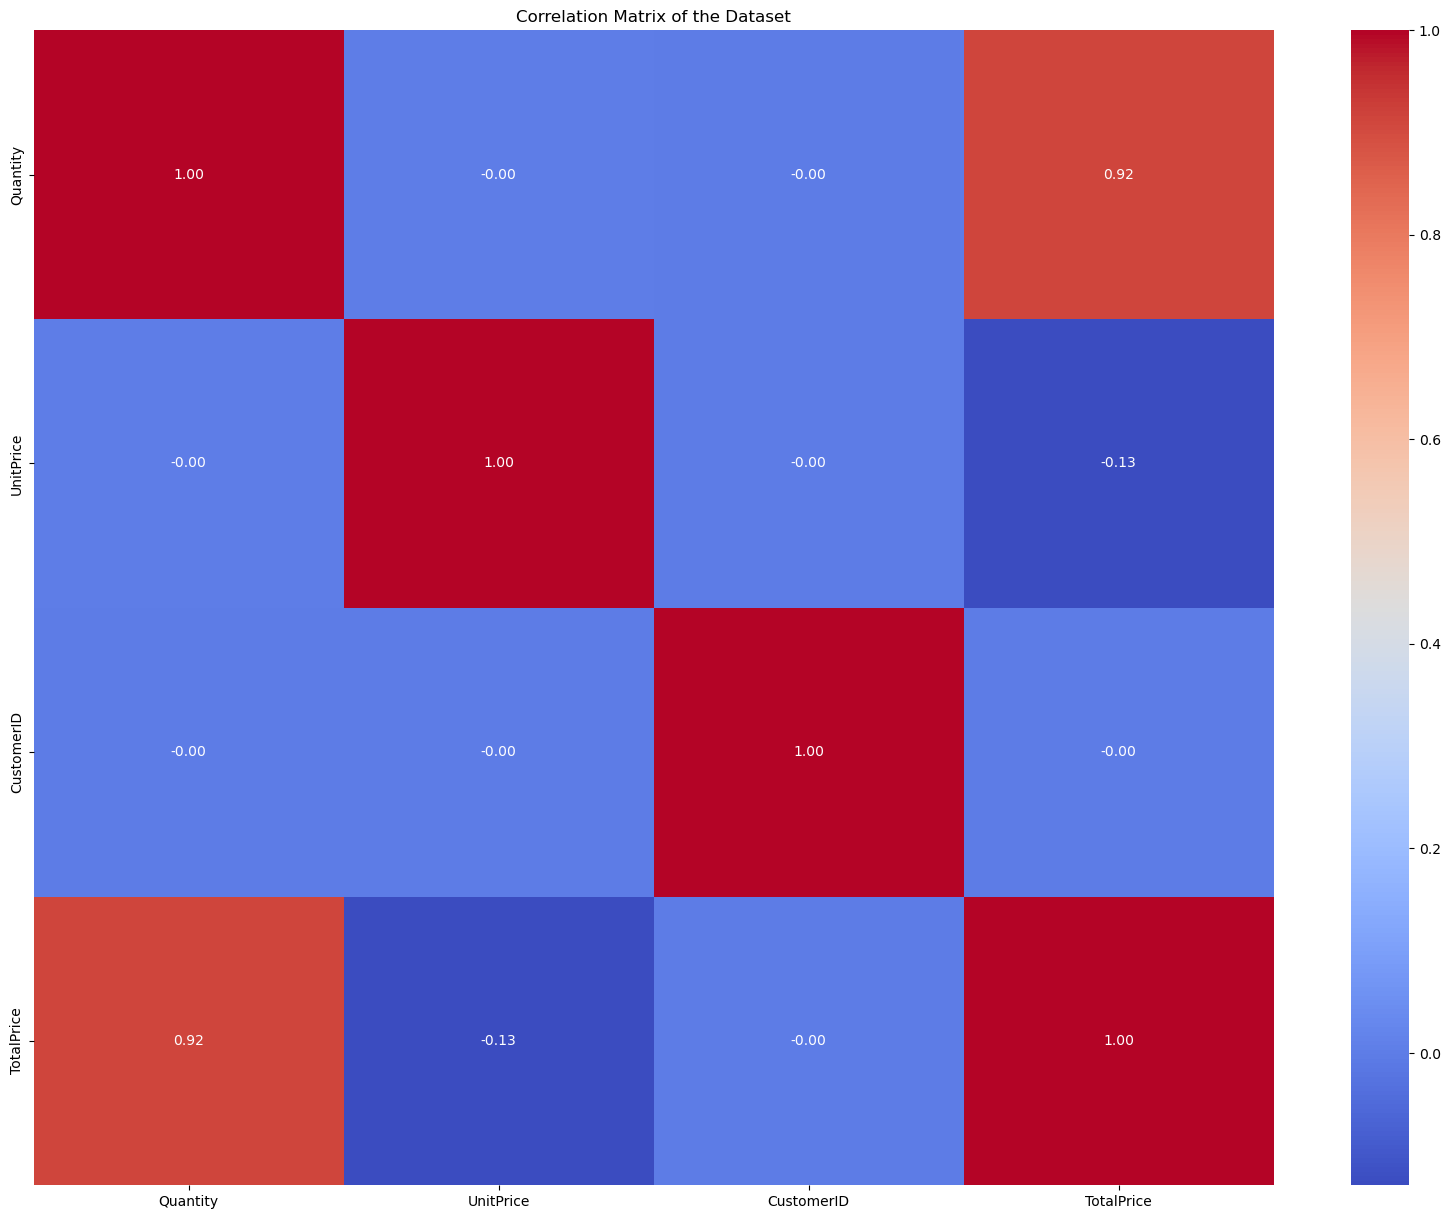

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the Dataset')
plt.show()


<Figure size 4000x3000 with 0 Axes>

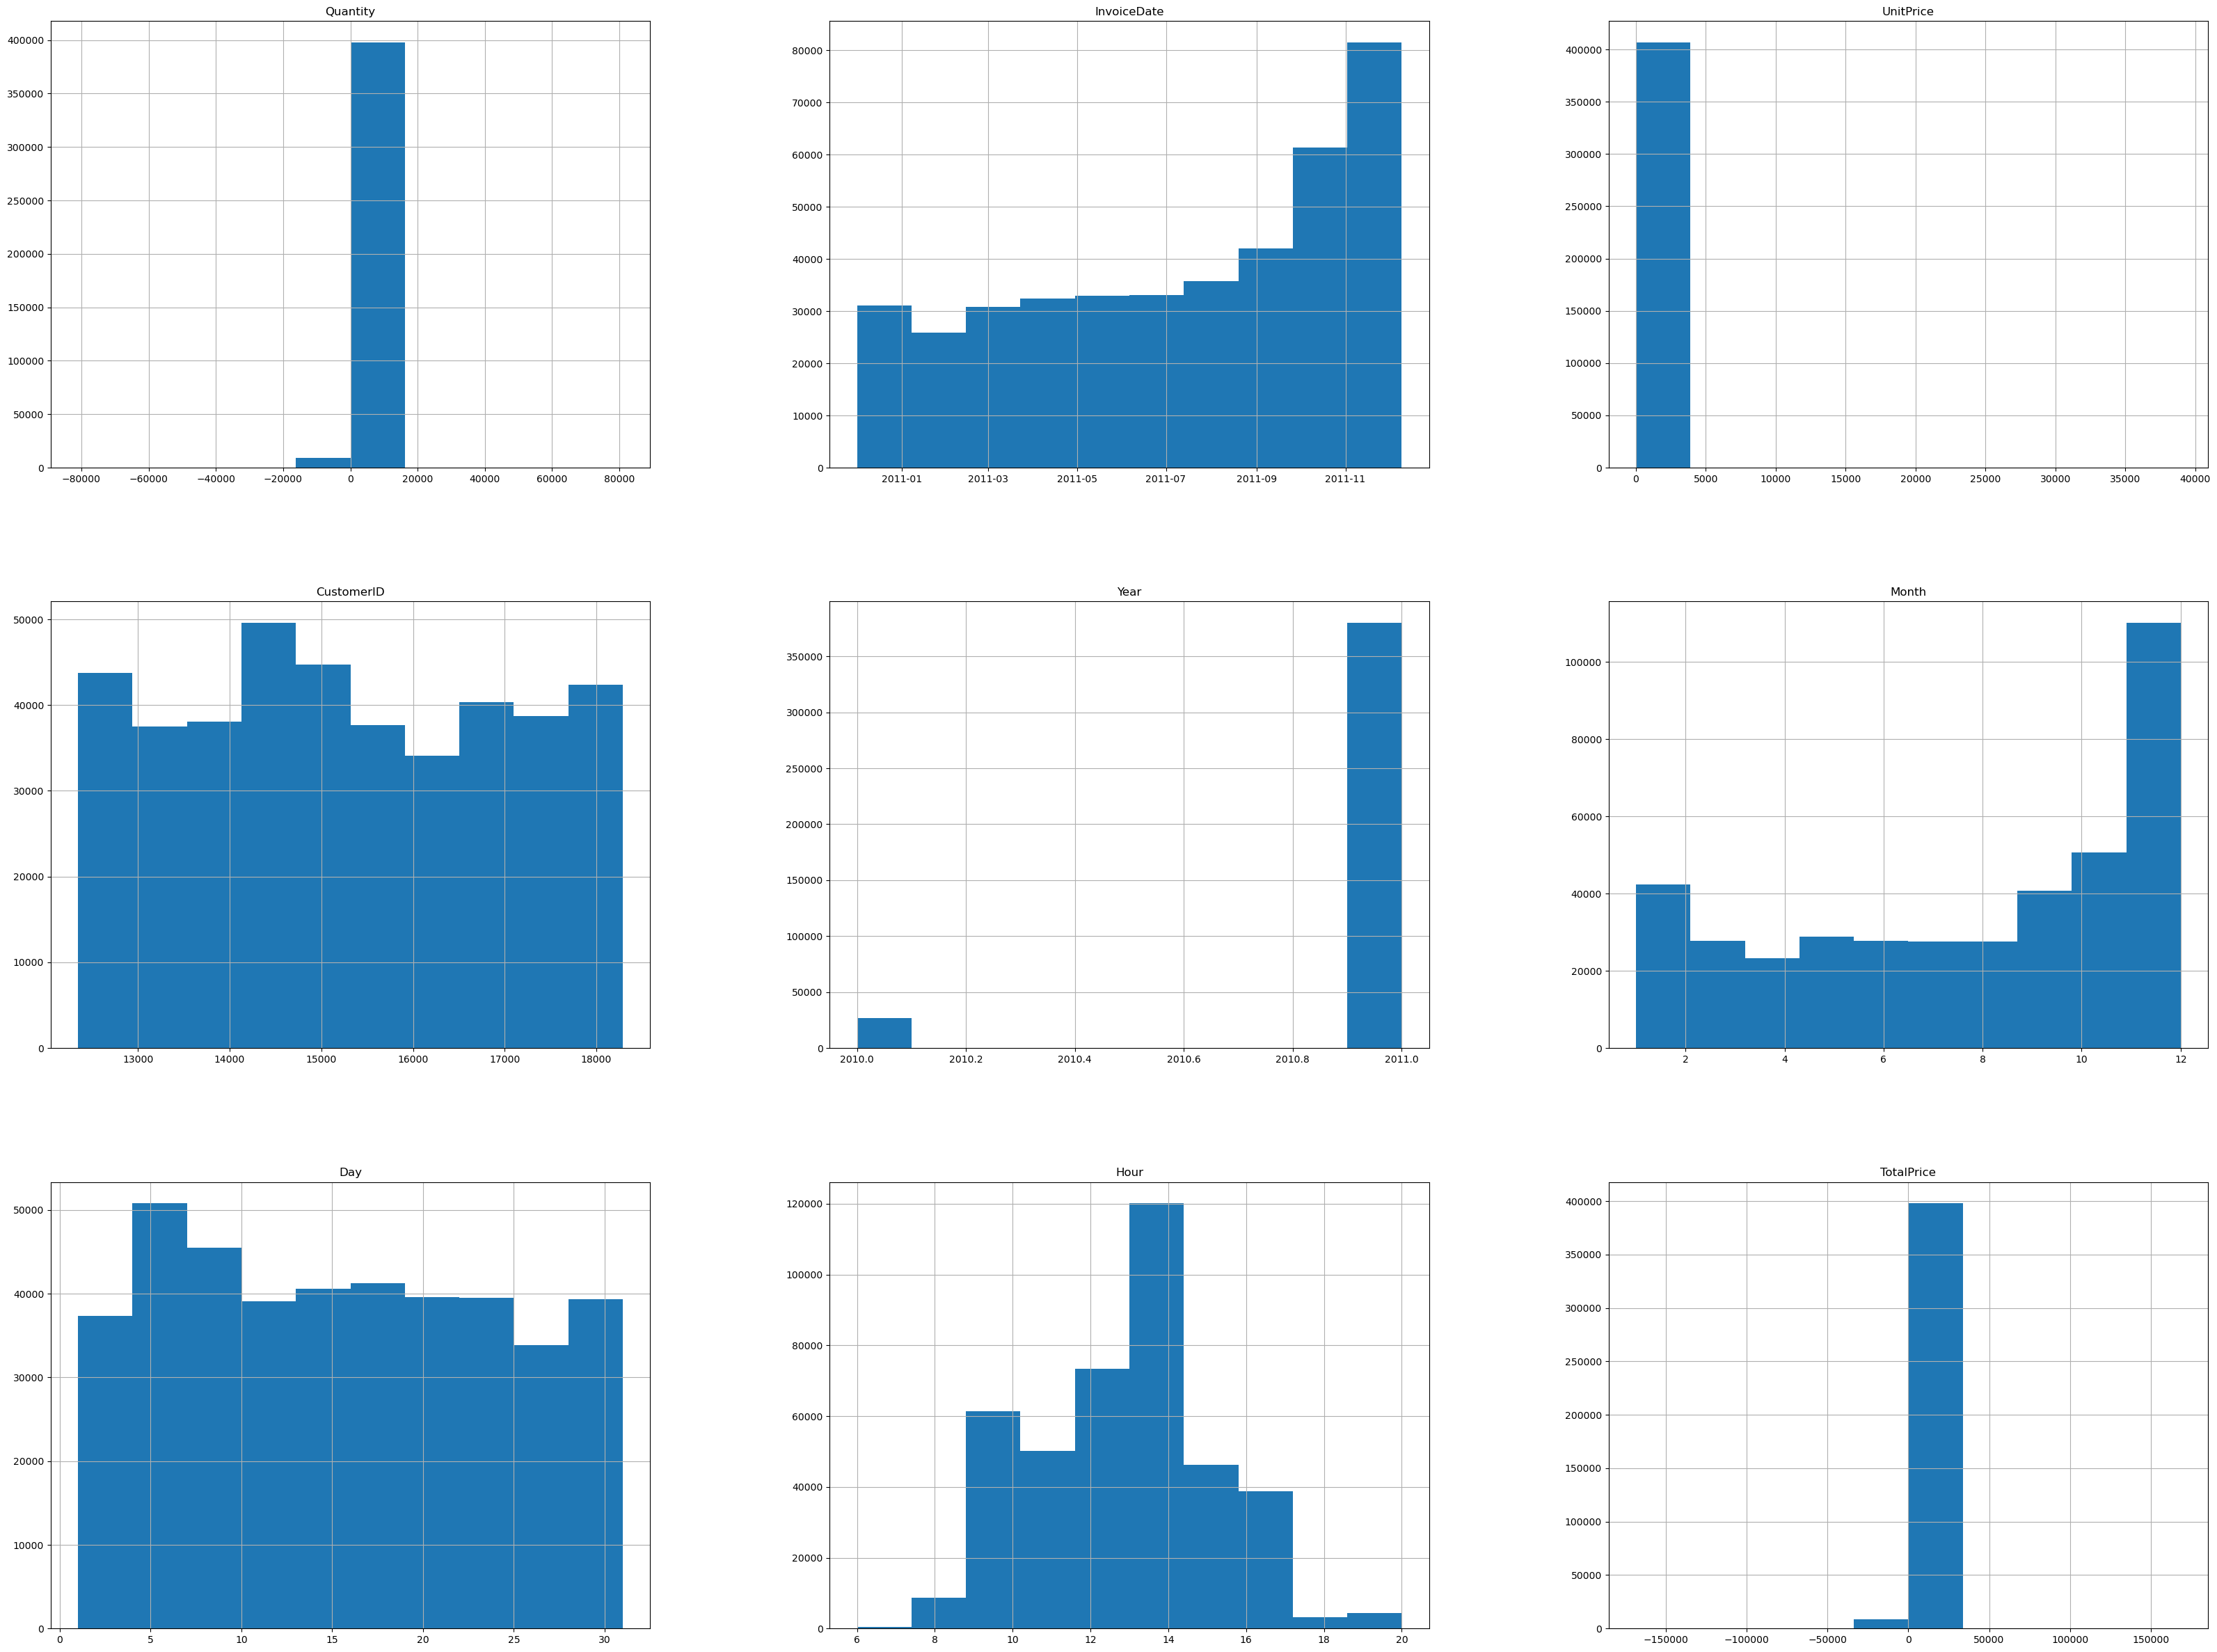

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns except the first two
plt.figure(figsize=(40, 30))
data.iloc[:, 2:].hist(figsize=(40, 30))
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for scaling
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
features = scaler.fit_transform(numeric_data)

# Display the scaled features
print(features)


[[5.00037039e-01 6.54349500e-05 9.26443360e-01 5.00045409e-01]
 [5.00037039e-01 8.69899923e-05 9.26443360e-01 5.00060367e-01]
 [5.00049386e-01 7.05671029e-05 9.26443360e-01 5.00065294e-01]
 ...
 [5.00024693e-01 1.06492173e-04 5.62194917e-02 5.00049267e-01]
 [5.00024693e-01 1.06492173e-04 5.62194917e-02 5.00049267e-01]
 [5.00018520e-01 1.27020785e-04 5.62194917e-02 5.00044073e-01]]


In [20]:
pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 282.6/282.6 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


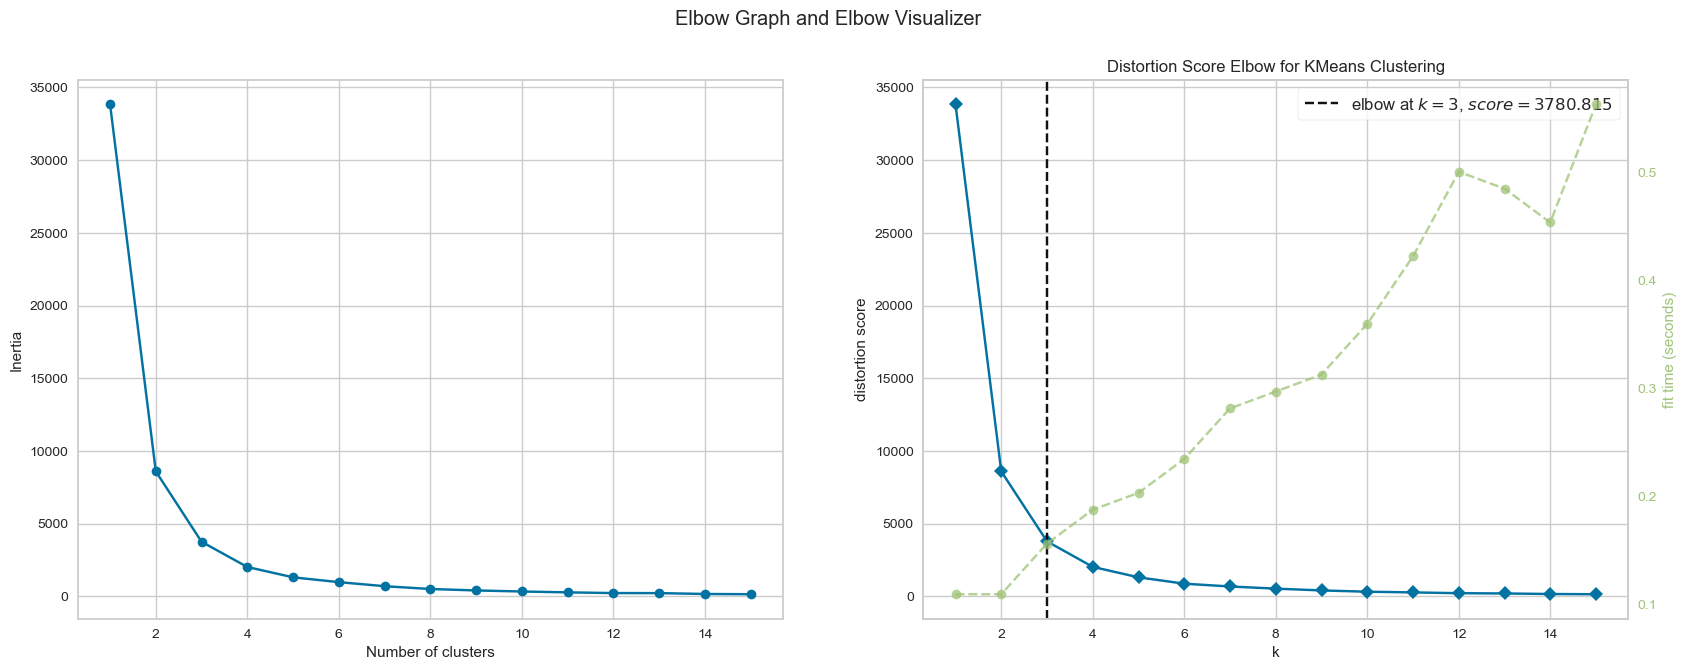

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize an empty list to store inertia values
inertia = []

# Iterate over a range of K values
for i in range(1, 16):
    # Initialize KMeans with the current K value
    k_means = KMeans(n_clusters=i)
    
    # Fit KMeans to the scaled features
    k_means.fit(features)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia.append(k_means.inertia_)

# Plot the elbow graph
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, 16), inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Initialize KMeans for the Kelbow visualizer
kmeans = KMeans()

# Create the Kelbow visualizer
plt.subplot(1, 2, 2)
visualizer = KElbowVisualizer(kmeans, k=(1, 16))

# Fit the visualizer to the scaled features
visualizer.fit(features)

# Display the Elbow Graph and Elbow Visualizer
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualizer.poof()
plt.show()


Cluster
0.0    105074
1.0    102996
2.0     94625
Name: count, dtype: int64


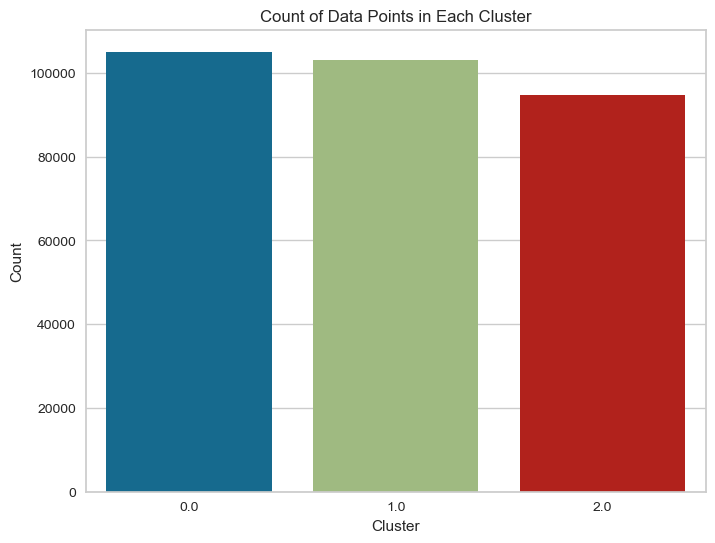

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming you have already defined and named your scaled features as `features`

# Fit KMeans model with K=3
model = KMeans(n_clusters=3)
model.fit(features)

# Predict cluster labels
y_km = model.predict(features)

# Add cluster labels to the original DataFrame
data['Cluster'] = pd.DataFrame(y_km)

# Save DataFrame with cluster labels to CSV
data.to_csv("Cluster_data.csv", index=False)

# Display the counts of each cluster
print(data['Cluster'].value_counts())

# Plot the count of each cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Cluster')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [12]:
import pandas as pd

# Assuming c_df contains your DataFrame with the relevant columns
c_df = pd.read_csv('Cluster_data.csv')

# Select only numeric columns for summing
numeric_columns = c_df.iloc[:, 3:38].select_dtypes(include='number')

# Calculate the total search by summing the values of numeric columns
c_df['Total Search'] = numeric_columns.sum(axis=1)

# Display the DataFrame with the added 'Total Search' column
print(c_df)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
406824    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
406825    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406826    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406827    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406828    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  Year  \

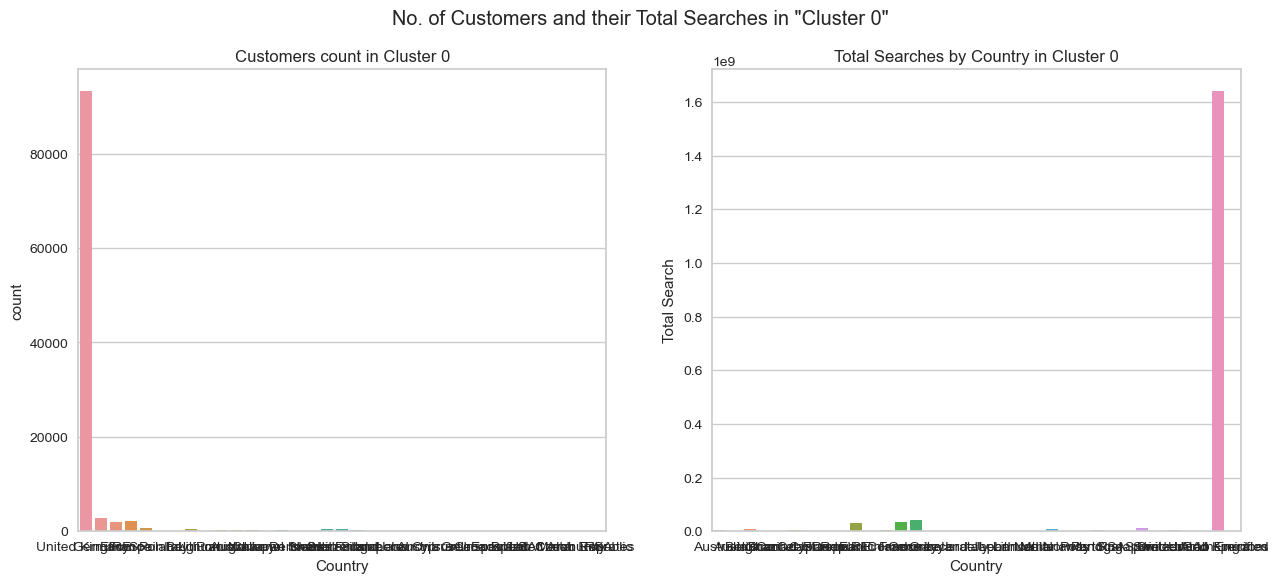

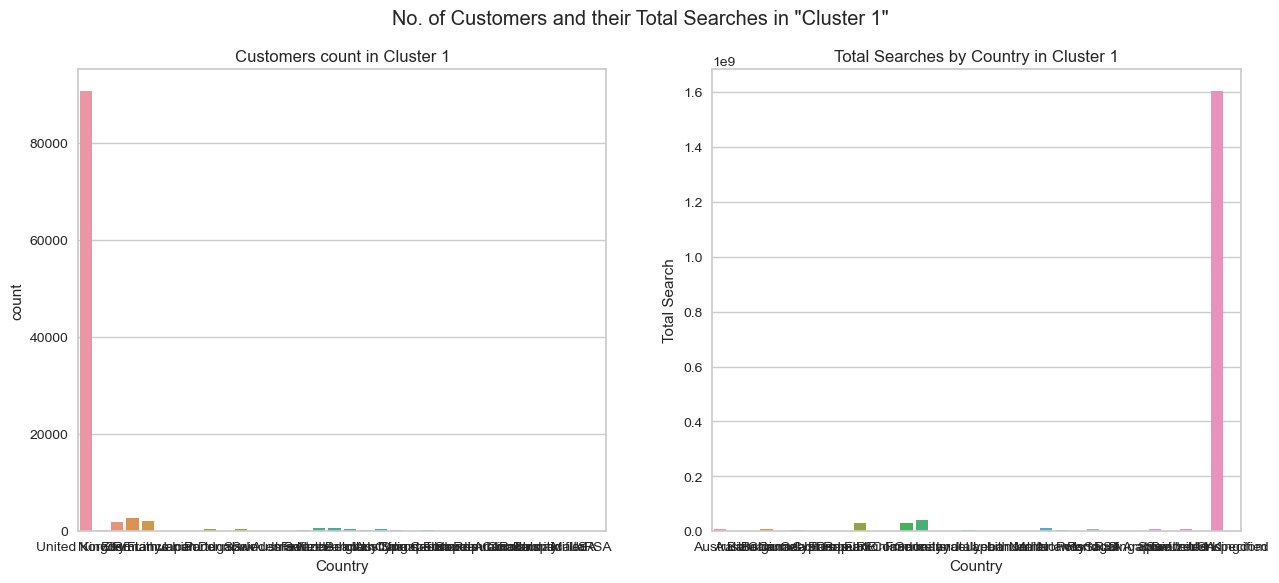

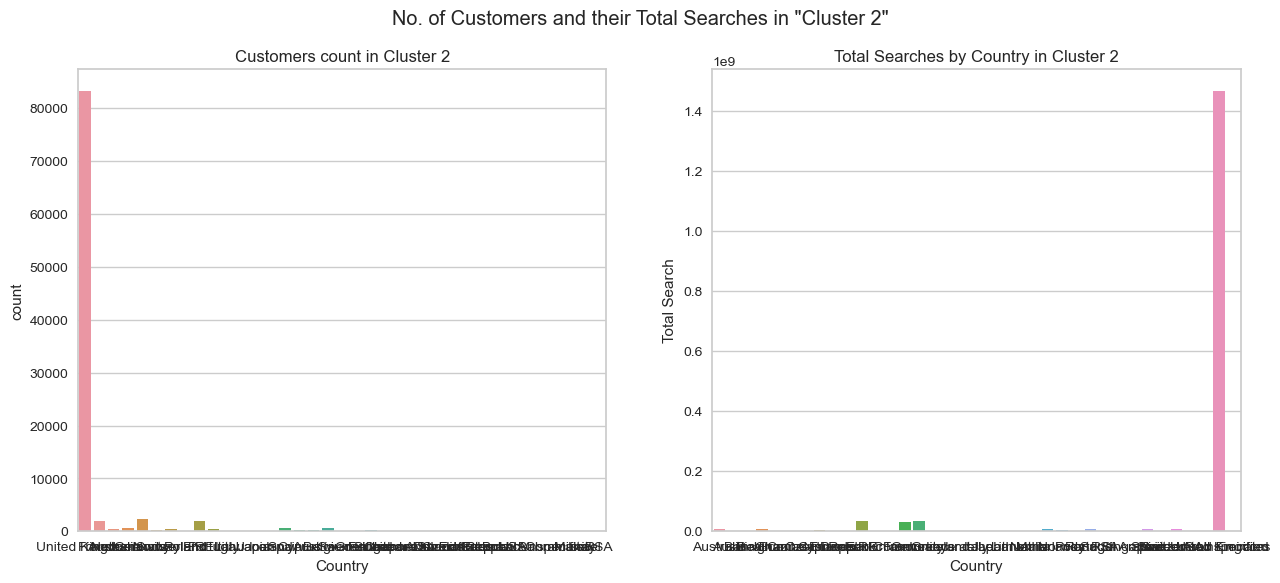

In [17]:
# Iterate over each cluster
for cluster_num in range(3):
    # Group by Cluster and Country, then sum the values
    cluster_data = c_df.groupby(['Cluster', 'Country'], as_index=False).sum().query(f'Cluster == {cluster_num}')
    
    # Plotting
    plt.figure(figsize=(15, 6))

    # Subplot 1: Countplot of customers by country in the current cluster
    plt.subplot(1, 2, 1)
    sns.countplot(data=c_df.query(f'Cluster == {cluster_num}'), x='Country')
    plt.title(f'Customers count in Cluster {cluster_num}')

    # Subplot 2: Barplot of total searches by country in the current cluster
    plt.subplot(1, 2, 2)
    sns.barplot(data=cluster_data, x='Country', y='Total Search')
    plt.title(f'Total Searches by Country in Cluster {cluster_num}')

    # Super title for the entire figure
    plt.suptitle(f'No. of Customers and their Total Searches in "Cluster {cluster_num}"')

    # Show the plot
    plt.show()


In [14]:
# Group by Cluster and calculate the sum of numerical columns
final_df = c_df.groupby(['Cluster'], as_index=False).sum()

# Display the resulting DataFrame
print(final_df)

   Cluster                                          InvoiceNo  \
0      0.0  5363745363765363765363785363785363785363785363...   
1      1.0  5363655363655363655363655363655363655363655363...   
2      2.0  5363675363675363675363675363675363675363675363...   

                                           StockCode  \
0  2125822114217332238685099C210332072384997B8499...   
1  85123A7105384406B84029G84029E22752217302263322...   
2  8487922745227482274922310849692262322622217542...   

                                         Description  Quantity  \
0  VICTORIAN SEWING BOX LARGEHOT WATER BOTTLE TEA...   1290521   
1  WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...   1310739   
2  ASSORTED COLOUR BIRD ORNAMENTPOPPY'S PLAYHOUSE...   1194774   

                                         InvoiceDate   UnitPrice  \
0  2010-12-01 09:09:002010-12-01 09:32:002010-12-...  368365.111   
1  2010-12-01 08:26:002010-12-01 08:26:002010-12-...  379999.452   
2  2010-12-01 08:34:002010-12-01 08:34:002010

FINAL CONCLUSION :
    Based on the analysis of the clustering results and the distribution of customers across different clusters, we can derive the following conclusions:

Cluster Distribution: The dataset has been segmented into three distinct clusters based on customer behavior and characteristics.

Customer Count: Cluster 0 has the highest count of customers, followed by Cluster 1, and then Cluster 2. This indicates that a significant portion of customers falls into Cluster 0, suggesting a particular pattern or behavior among this group.

Geographical Analysis: By analyzing the distribution of customers across different countries within each cluster, we can gain insights into regional preferences or market penetration. This information can be valuable for targeted marketing or expansion strategies.

Search Behavior: The total searches performed by customers within each cluster provide insights into their level of engagement or interest in products or services. Understanding the search behavior of each cluster can aid in tailoring marketing campaigns or product recommendations to better meet customer needs and preferences.

Total Sales and Other Metrics: Further analysis of total sales, quantity purchased, or other relevant metrics within each cluster can provide additional insights into customer segments' purchasing power, preferences, or buying patterns.

In conclusion, by segmenting customers into distinct clusters and analyzing their characteristics and behavior, businesses can better understand their customer base, target marketing efforts more effectively, and make informed business decisions to drive growth and profitability.






